# Implémentation de l'algorithme de l'arbre de décision CART

### Algorithme de l'arbre de décision
Les modèles d'arbre de décision fonctionne en partitionnant de manière à répétée les données en plusieurs sous-espaces, de sorte que les résultats dans chaque sous-espace final soient aussi homogènes que possible. Cette approche est techniquement appelée partitionnement récursif.
Le résultat produit consiste en un ensemble de règles utilisées pour prédire la variable de résultat, qui peut être soit :
1. une variable continue, pour les arbres de régression
2. une variable catégorielle, pour les arbres de classification 
    
<p>Les règles de décision générées par le modèle prédictif CART sont généralement visualisées sous la forme d'un arbre binaire.</p>

#### **Installation et Importation des packages nécessaires**

In [12]:
#install.packages("tidyverse")
#install.packages("caret")
#install.packages("stringi")
#install.packages("numDeriv")
#install.packages("magrittr")
#install.packages("mlbench")

library(tidyverse)  
library(caret)      
library(rpart)
library(numDeriv)
library(magrittr)
library(mlbench)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift


Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract



#### **Description des packages**
1. Le **tidyverse** est une collection de packages R conçus pour la science des données. Tous les packages partagent une philosophie de conception, une grammaire et des structures de données sous-jacentes (dplyr, ggplot2, readr, stringr, purrr, tidyr, tibble).
2. Le **caret** (abréviation de Classification And Regression Training) est un ensemble de fonctions qui tentent de rationaliser le processus de création de modèles prédictifs. Le package contient des outils pour :

* le fractionnement des données
* le prétraitement
* la sélection des caractéristiques
* le réglage du modèle en utilisant le rééchantillonnage
* l'estimation de l'importance des variables
3. Le **stringi** est Une collection d'outils de traitement des chaînes de caractères, du texte et du langage naturel pour la recherche de motifs (par exemple, avec des expressions régulières de type "Java" ou l'algorithme de collation "Unicode"), la génération de chaînes aléatoires, la mise en correspondance des majuscules et des minuscules, la translittération des chaînes, la concaténation, le tri, le remplissage, l'emballage, la normalisation Unicode, le formatage et l'analyse de la date et de l'heure, etc.
4. Les **numDeriv** (Accurate Numerical Derivatives) Contient les méthodes de calcul des dérivées numériques (généralement) exactes de premier et second ordre
5. Le **magrittr** a deux objectifs : réduire le temps de développement et améliorer la lisibilité et la maintenabilité du code.
6. Le **mlbench** est Une collection de problèmes de référence d'apprentissage automatique artificiels et réels, y compris, par exemple, plusieurs ensembles de données provenant du répository de l'UCI.


#### **Un modèle simple de l'arbre de décision en utilisant le jeux de donnée iris**

L'ensemble de données sur les fleurs d'iris ou ensemble de données sur les iris de Fisher est un ensemble de données multivariées introduit par le statisticien et biologiste britannique Ronald Fisher dans son article de 1936 intitulé The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

| Les caractéristiques de dataset  |`Multivariate`      | Nombre d'instance    | `150`  |
| ---------------------------------|:------------------:|:--------------------:|-------:|
|**Caractéristique de l'atribut**  |**`Réel`**          |**Nombre d'atrributs**|**`4`** |
| **Les Tasks Associées**          |**`Classification`**|**Valeurs manquantes**|**`No`**|

**Information sur les attributs:**
1. La longueur de sepal est en cm
2. La largeur de sepal est en cm
3. La longeur de petal est en cm
4. La largeur de petal est en cm
**Les classes**:
+ Iris Setosa
+ Iris Versicolor
+ Iris Virginica

In [9]:
# Chargement et affichage des données
data(iris)
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [10]:
# Exploration des données
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


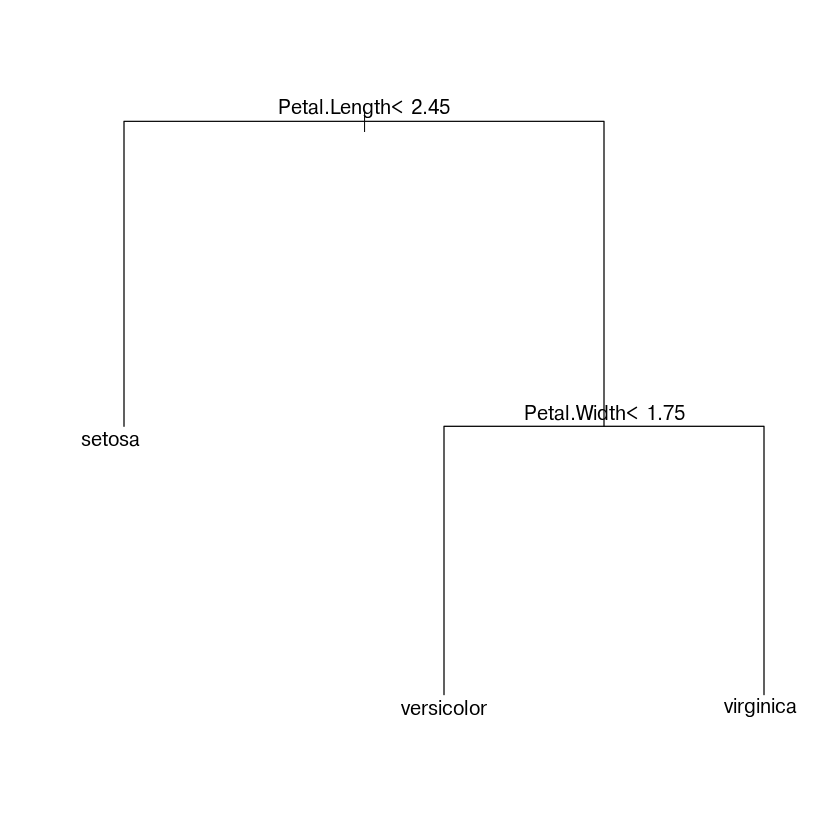

In [14]:
# Construction de modèle pour la classification des données d'iris en 3 class: Setosa, Versicolor, Virginica
model <- rpart(formula = Species ~., data = iris, method = "class", parms = list(split = "gini"))
par(xpd = NA) # Évitez de couper le texte dans certains dispositifs
plot(model)
text(model, digits = 3)

la division supérieure attribue les observations ayant Petal.length < 2.45 à la branche gauche, où les espèces prédites sont setosa.

In [9]:
# Affichage de l'arbre résultante
print(model, digits = 2)

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.333 0.333 0.333)  
  2) Petal.Length< 2.5 50   0 setosa (1.000 0.000 0.000) *
  3) Petal.Length>=2.5 100  50 versicolor (0.000 0.500 0.500)  
    6) Petal.Width< 1.8 54   5 versicolor (0.000 0.907 0.093) *
    7) Petal.Width>=1.8 46   1 virginica (0.000 0.022 0.978) *


+ L'arbre résultant est composé de nœuds de décision, de branches et de nœuds feuilles. L'arbre est placé de haut en bas, de sorte que la racine se trouve en haut et les feuilles indiquant le résultat sont placées en bas.

+ Chaque nœud de décision correspond à une seule variable prédictive d'entrée et à un seuil de séparation sur cette variable. Les nœuds feuilles de l'arbre sont la variable de résultat qui est utilisée pour faire des prédictions.

+ L'arbre croît à partir du sommet (racine), à chaque nœud l'algorithme décide de la meilleure coupure de division qui résulte en la plus grande pureté (ou homogénéité) dans chaque sous-partition.

+ La croissance de l'arbre s'arrête lorsque les trois critères suivants sont remplis (Zhang 2016):
1. tous les nœuds feuilles sont purs avec une seule classe
2. un nombre minimum pré-spécifié d'observations de d'entrainement qui ne peuvent pas être assignées à chaque nœud feuille avec n'importe quelle méthode de fractionnement
3. Le nombre d'observations dans le nœud feuille atteint le minimum pré-spécifié.
+ Un arbre entièrement développé surajustera les données d'apprentissage et le modèle résultant pourrait ne pas être performant pour prédire le résultat de nouvelles données de test. Des techniques, telles que l'élagage, sont utilisées pour contrôler ce problème.

+ Choix des points de séparation des arbres
Dans le cadre de la classification, le point de séparation est défini de manière à ce que la population des sous-partitions soit aussi pure que possible. Deux mesures de pureté sont généralement utilisées, notamment l'indice de Gini et l'entropie (ou gain d'information).
Pour une sous-partition donnée, Gini = somme(p(1-p)) et entropie = -1*somme(p*log(p)), où p est la proportion d'observations mal classées au sein de la sous-partition. 

+ La somme est calculée sur les différentes catégories ou classes de la variable de résultat. L'indice de Gini et l'entropie varient de 0 (pureté maximale) à 1 (degré d'impureté maximal).


### **2ème Example avec le jeux de données PimaIndiansDiabetes2**

**Informations sur les attributs de jeux de données**
+ pregnant: Nombre de grossesses
+ glucose: Concentration de glucose dans le plasma (test de tolérance au glucose)
+ pressure: Pression sanguine diastolique (mm Hg)
+ triceps: Épaisseur du pli cutané du triceps (mm)
+ insulin: Insuline sérique à 2 heures (mu U/ml)
+ mass: Indice de masse corporelle (poids en kg/(taille en m)\^2)
+ pedigree: Fonction de pedigree du diabète
+ age: âge en années
+ diabetes: Variable de classe (test de dépistage du diabète)



In [6]:
# Charger les données et supprimer les NAs
data("PimaIndiansDiabetes2", package = "mlbench")
PimaIndiansDiabetes2 <- na.omit(PimaIndiansDiabetes2)

In [7]:
# Affichage de données
head(PimaIndiansDiabetes2)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
4,1,89,66,23,94,28.1,0.167,21,neg
5,0,137,40,35,168,43.1,2.288,33,pos
7,3,78,50,32,88,31.0,0.248,26,pos
9,2,197,70,45,543,30.5,0.158,53,pos
14,1,189,60,23,846,30.1,0.398,59,pos
15,5,166,72,19,175,25.8,0.587,51,pos


In [8]:
# Exploration des données
str(PimaIndiansDiabetes2)

'data.frame':	392 obs. of  9 variables:
 $ pregnant: num  1 0 3 2 1 5 0 1 1 3 ...
 $ glucose : num  89 137 78 197 189 166 118 103 115 126 ...
 $ pressure: num  66 40 50 70 60 72 84 30 70 88 ...
 $ triceps : num  23 35 32 45 23 19 47 38 30 41 ...
 $ insulin : num  94 168 88 543 846 175 230 83 96 235 ...
 $ mass    : num  28.1 43.1 31 30.5 30.1 25.8 45.8 43.3 34.6 39.3 ...
 $ pedigree: num  0.167 2.288 0.248 0.158 0.398 ...
 $ age     : num  21 33 26 53 59 51 31 33 32 27 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 1 2 2 2 2 2 2 1 2 1 ...
 - attr(*, "na.action")= 'omit' Named int  1 2 3 6 8 10 11 12 13 16 ...
  ..- attr(*, "names")= chr  "1" "2" "3" "6" ...


In [24]:
# Divisez les données en deux ensembles, l'un pour l'entrainement et l'autre pour le test.
set.seed(12345)
training.samples <- PimaIndiansDiabetes2$diabetes %>% createDataPartition(p = 0.8, list = FALSE)
train.data  <- PimaIndiansDiabetes2[training.samples, ]
test.data <- PimaIndiansDiabetes2[-training.samples, ]

In [26]:
# Construire le modèle
set.seed(123)
model1 <- rpart(formula = diabetes ~., data = train.data,  method = "class", parms = list(split = "gini"))

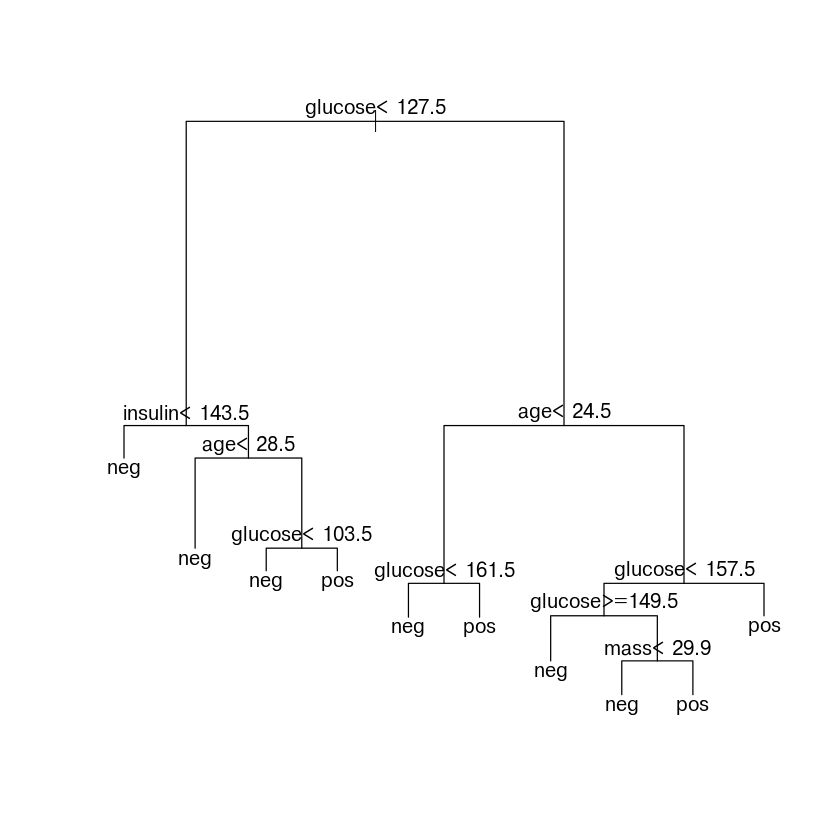

In [27]:
# Tracer les arbres
par(xpd = NA) # Évitez de couper le texte dans certains dispositifs
plot(model1)
text(model1, digits = 3)

5   9  33  44  54  70 
pos pos neg pos pos neg 
Levels: neg pos

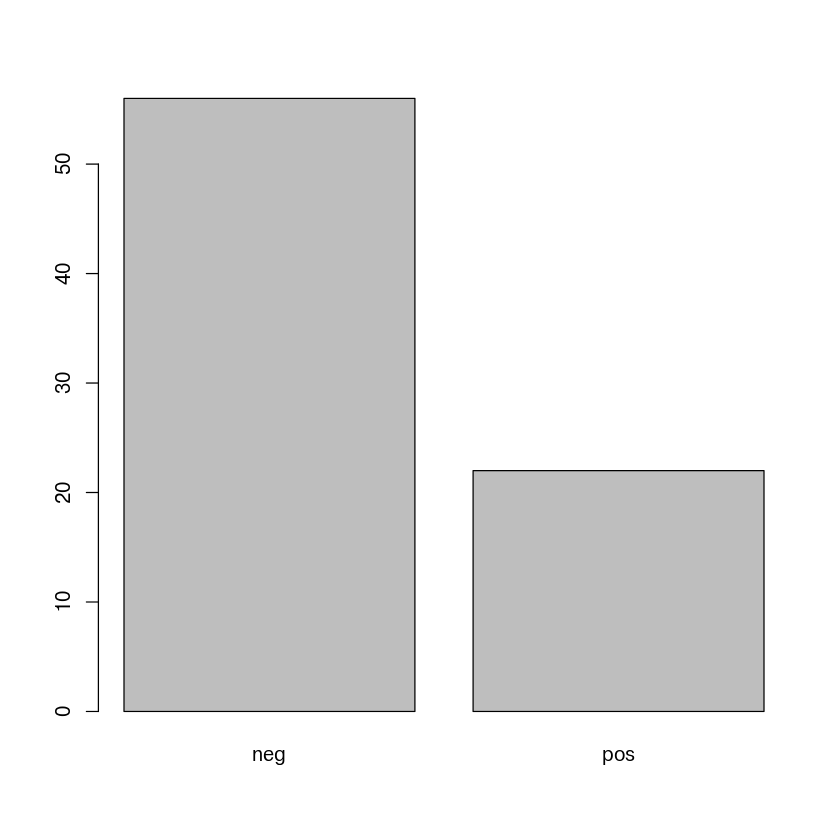

In [28]:
# Faire des prédictions sur les données du test
predicted.classes <- model1 %>% predict(test.data, type = "class")
head(predicted.classes)
plot(predicted.classes)

In [29]:
# Calculer le taux de précision du modèle sur les données de test
mean(predicted.classes == test.data$diabetes)

[1] 0.7435897

La précision globale de notre modèle d'arbre est de 74 %, ce qui n'est pas si mal.
Cet arbre complet incluant tous les prédicteurs semble très complexe et peut être difficile à interpréter dans le cas où vous disposez d'un grand ensemble de données avec plusieurs prédicteurs.
En outre, il est facile de voir qu'un arbre complet surajustera les données d'apprentissage et pourrait conduire à une mauvaise performance de l'ensemble de test.
Une stratégie pour limiter cet excès d'adaptation consiste à élaguer l'arbre, ce qui permet d'obtenir un arbre plus simple avec moins de divisions et une meilleure interprétation, au prix d'un léger biais (James et al. 2014, P. Bruce et Bruce (2017)).

### Élagage de l'arbre

En bref, notre objectif ici est de voir si un sous-arbre plus petit peut nous donner des résultats comparables à ceux de l'arbre complet. Si c'est le cas, nous devrions opter pour l'arbre le plus simple, car il réduit la probabilité de surajustement.

Une stratégie robuste possible pour élaguer l'arbre (ou arrêter la croissance de l'arbre) consiste à éviter de diviser une partition si la division n'améliore pas de manière significative la qualité globale du modèle.

Dans le package rpart, ceci est contrôlé par le paramètre de complexité (cp), qui impose une pénalité à l'arbre pour avoir deux nombreux fractionnements. La valeur par défaut est de 0,01. Plus le cp est élevé, plus l'arbre est petit.

Une valeur trop faible de cp conduit à un surajustement et une valeur trop élevée de cp se traduira par un arbre trop petit. Les deux cas diminuent la performance prédictive du modèle.

Une valeur cp optimale peut être estimée en testant différentes valeurs cp et en utilisant des approches de validation croisée pour déterminer la précision de prédiction correspondante du modèle. Le meilleur cp est alors défini comme celui qui maximise la précision de la validation croisée.

L'élagage peut être facilement effectué avec le package caret, qui invoque la méthode rpart pour tester automatiquement différentes valeurs possibles de cp, puis choisit le cp optimal qui maximise la précision de la validation croisée ("cv"), et ajuste le meilleur modèle CART final qui explique le mieux nos données.
Vous pouvez utiliser les arguments suivants dans la fonction train() :
+ trControl, pour configurer la validation croisée 10 fois
+ tuneLength, pour spécifier le nombre de valeurs cp possibles à évaluer. La valeur par défaut est 3, ici nous utiliserons 10.

In [30]:
# Ajuster le modèle sur l'ensemble de données d'entrainement
set.seed(123)
model2 <- train(
  formula = diabetes ~., data = train.data, method = "rpart",
  trControl = trainControl("cv", number = 10),
  tuneLength = 10)

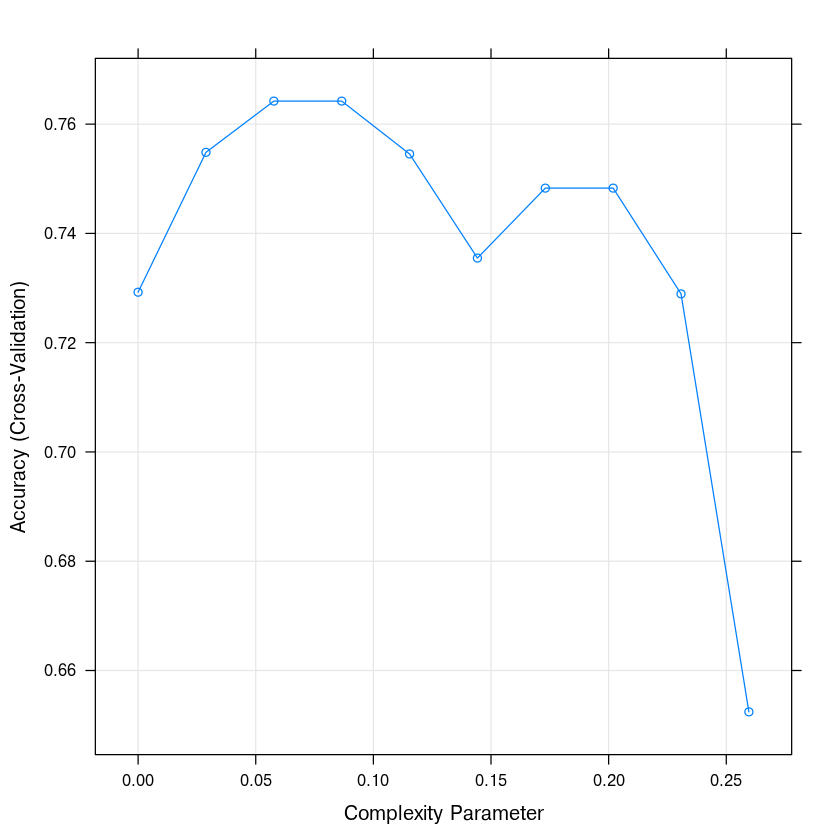

In [31]:
# Tracez la précision du modèle en fonction de différentes valeurs de cp (paramètre de complexité).
plot(model2)

In [32]:
# Le meilleur paramètre de réglage cp qui maximise la précision du modèle
model2$bestTune

,cp
4,0.08653846


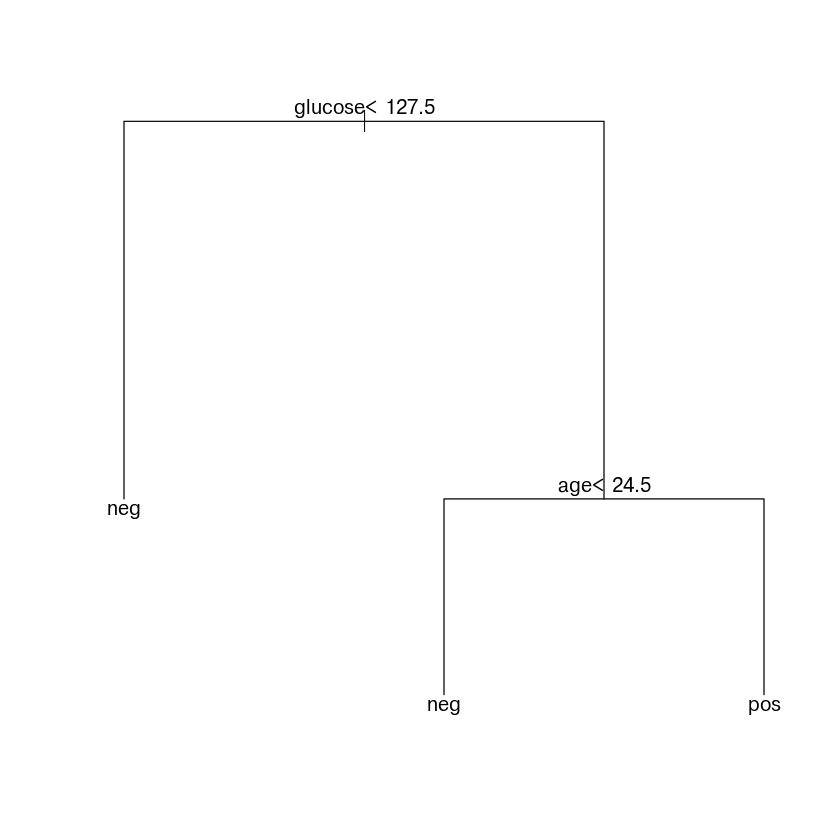

In [33]:
# Traçer le modèle finale
par(xpd = NA) # Évitez de couper le texte dans certains dispositifs
plot(model2$finalModel)
text(model2$finalModel,  digits = 3)

In [34]:
# Decision rules in the model
model2$finalModel

n= 314 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 314 104 neg (0.6687898 0.3312102)  
  2) glucose< 127.5 197  32 neg (0.8375635 0.1624365) *
  3) glucose>=127.5 117  45 pos (0.3846154 0.6153846)  
    6) age< 24.5 26   6 neg (0.7692308 0.2307692) *
    7) age>=24.5 91  25 pos (0.2747253 0.7252747) *

In [35]:
# Faire des prédictions sur les données du test
predicted.classes <- model2 %>% predict(test.data)
# Calculer le taux de précision du modèle sur les données de test
mean(predicted.classes == test.data$diabetes)

[1] 0.7692308

D'après les résultats ci-dessus, on constate que la meilleure valeur pour le paramètre de complexité (cp) est 0,086, ce qui permet d'obtenir un arbre plus simple, facile à interpréter, avec une précision globale de 77 %, ce qui est comparable à la précision (74 %) que nous avons obtenue avec l'arbre complet. La précision de prédiction de l'arbre élagué est même meilleure que celle de l'arbre complet. Nous devrions donc opter pour le modèle le plus simple.

### **L'arbre de décision pour la régression avec le jeux de données Housing Boston**

Ce jeu de données contient des informations recueillies par le service de recensement des États-Unis concernant le logement dans la région de Boston Mass.

+ **Informations sur les attributs**
+ CRIM - taux de criminalité par habitant par ville
+ ZN - proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pieds carrés.
+ INDUS - proportion d'acres d'entreprises non commerciales par ville.
+ CHAS - Variable muette Charles River (1 si la parcelle borde la rivière, 0 sinon).
+ NOX - concentration d'oxydes nitriques (parties par 10 millions).
+ RM - nombre moyen de pièces par logement
+ AGE - proportion de logements occupés par leur propriétaire construits avant 1940
+ DIS - distances pondérées à cinq centres d'emploi de Boston
+ RAD - indice d'accessibilité aux autoroutes radiales
+ TAX - taux de l'impôt foncier sur la pleine valeur par 10 000 dollar
+ PTRATIO - ratio élèves/professeurs par ville
+ B - 1000(Bk - 0,63)^2 où Bk est la proportion de Noirs par ville
+ LSTAT - % de statut inférieur de la population
+ MEDV - Valeur médiane des maisons occupées par leur propriétaire, en milliers de $.

In [4]:
# Chargement des données
data("Boston", package = "MASS")
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [5]:
#Exploration des données
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [37]:
# Divisez les données en deux ensembles, l'un pour la entrainement et l'autre pour le test.
set.seed(123)
training.samples <- Boston$medv %>% createDataPartition(p = 0.8, list = FALSE)
train.data  <- Boston[training.samples, ]
test.data <- Boston[-training.samples, ]

Ici, la meilleure valeur cp est celle qui minimise l'erreur de prédiction RMSE (root mean squared error).
La RMSE est calculée comme suit : RMSE = mean((observés - predictés)^2) %>% sqrt(). Plus la RMSE est faible, meilleur est le modèle.

In [38]:
# Ajuster le modèle sur l'ensemble d'entraînement
set.seed(123)
model <- train(
  medv ~., data = train.data, method = "rpart",
  trControl = trainControl("cv", number = 10),
  tuneLength = 10
)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

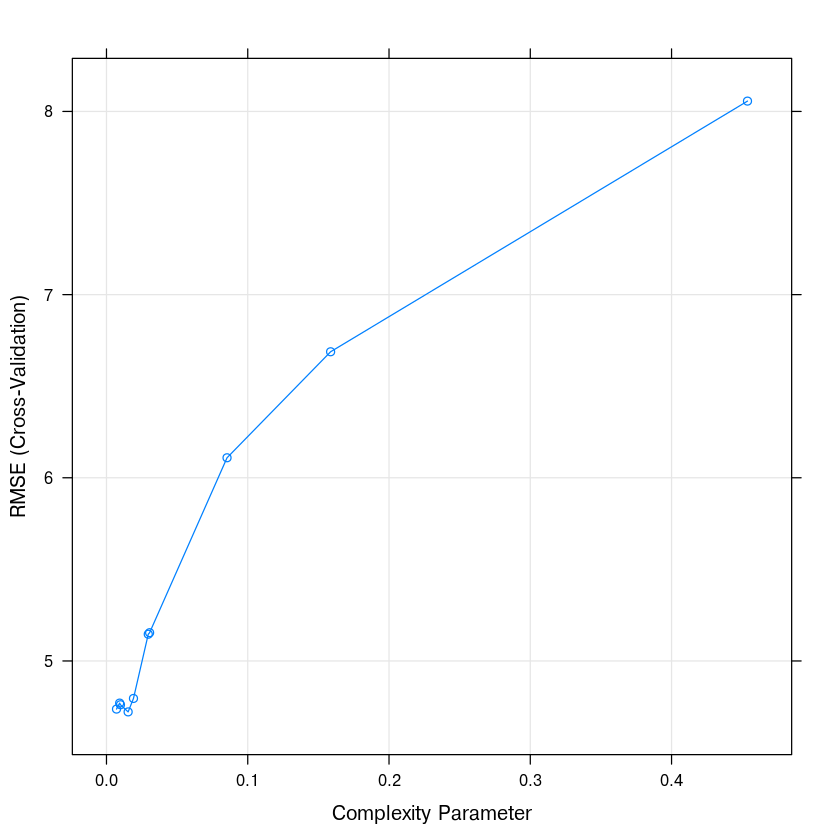

In [39]:
# Tracer l'erreur du modèle en fonction de différentes valeurs de cp (paramètre de complexité)
plot(model)

In [40]:
# Afficher le meilleur paramètre de réglage cp qui
# minimiser RMSE
model$bestTune

,cp
4,0.015327


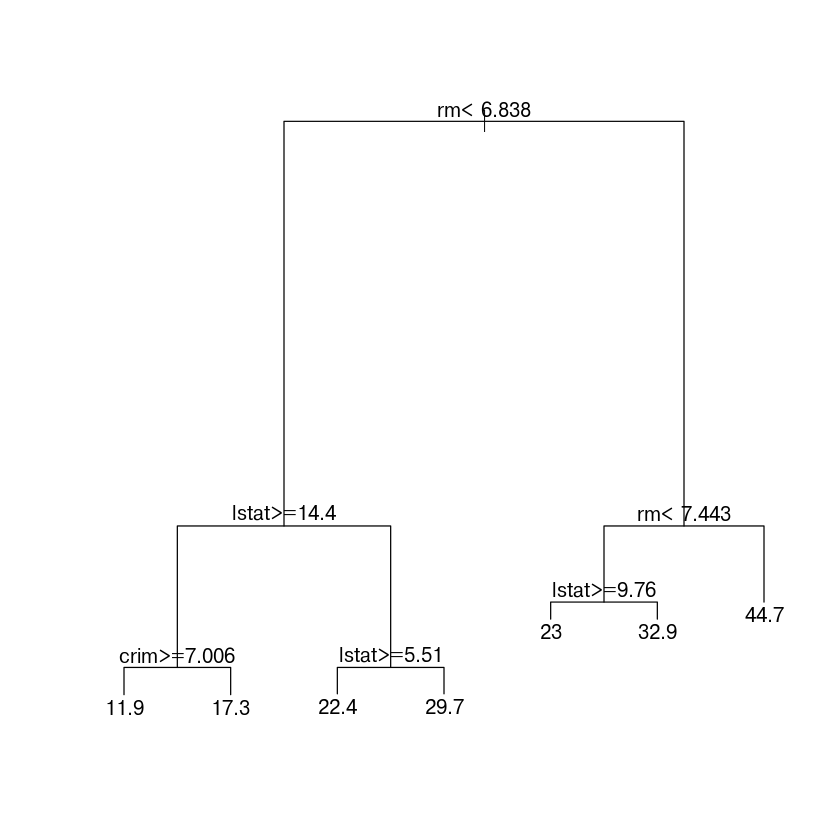

In [41]:
# Tracez le modèle d'arbre final
par(xpd = NA) # Évitez de couper le texte dans certains dispositifs
plot(model$finalModel)
text(model$finalModel, digits = 3)

In [42]:
# Règles de décision dans le modèle
model$finalModel

n= 407 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 407 34125.5800 22.51057  
   2) rm< 6.8375 334 12681.2200 19.62695  
     4) lstat>=14.4 146  2607.9150 15.05822  
       8) crim>=7.006285 60   659.0840 11.86000 *
       9) crim< 7.006285 86   906.9406 17.28953 *
     5) lstat< 14.4 188  4659.1330 23.17500  
      10) lstat>=5.51 167  2966.0360 22.35329 *
      11) lstat< 5.51 21   683.6381 29.70952 *
   3) rm>=6.8375 73  5959.9890 35.70411  
     6) rm< 7.443 49  2037.2070 31.28367  
      12) lstat>=9.76 8   440.5750 23.02500 *
      13) lstat< 9.76 41   944.5190 32.89512 *
     7) rm>=7.443 24  1010.4700 44.72917 *

In [43]:
# Faire des prédictions sur les données du test
predictions <- model %>% predict(test.data)
head(predictions)
# Calculer le taux de précision du modèle sur les données de test
RMSE(predictions, test.data$medv)

3        6        9       11       14       15 
32.89512 29.70952 17.28953 17.28953 22.35329 22.35329

[1] 4.484213